In [6]:
# 导入样数据集生成器
from sklearn.datasets import make_blobs
# 从近邻算法子库中导入K近邻分类器KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# 导入绘图工具箱 matplotlib
import matplotlib.pyplot as plt
# 从模型选择子库中导入数据集拆分工具
from sklearn.model_selection import train_test_split
#导入计算库
import numpy as np

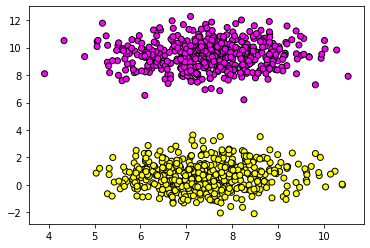

In [7]:
# 生成数据集，样本数=1000, 类别数=2
X, y = make_blobs(n_samples = 1000, centers = 2, random_state = 8)

# 将生成的数据集进行可视化
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.spring, edgecolor = 'k')
plt.show()

In [9]:
# # 使用手动方式指定聚类中心，并生成数据集，样本数=1000，类别数=3
# centers = [[2, -2], [2, 2], [0, 4]]
# X2, y2 = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.6, random_state = 8)

# c = np.array(centers) # 将聚类中心转换为 numpy矩阵

# # 将生成的数据集进行可视化
# plt.scatter(X2[:, 0], X2[:, 1], c = y2, cmap = plt.cm.spring, edgecolor = 'k')
# plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='blue')  # 绘制聚类中心
# plt.show()

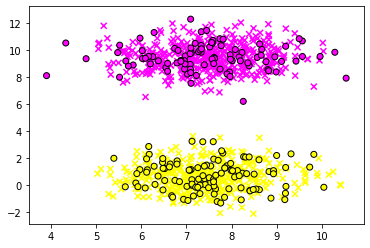

In [15]:
X_train = X[0:800]
y_train = y[0:800]
X_test = X[800:]
y_test = y[800:]

# 分别可视化训练样本和测试样本
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.spring, edgecolor = 'k', marker='x')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.spring, edgecolor = 'k', marker='o')
plt.show()

In [16]:
# 使用生成的训练集数据(X, y)训练KNN分类器
clf = KNeighborsClassifier(n_neighbors = 5) # n_neighbors = 5为默认近邻数量
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

正在使用模型，对训练样本的 y 值进行预测...执行时间为：19.71


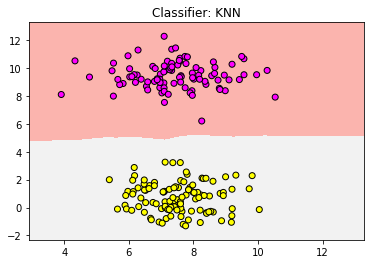

In [17]:
# import time

# t_start = time.perf_counter() # 启动计时器
# print("正在使用模型，对训练样本的 y 值进行预测...", end="")

# # 将分类结果进行可视化
# #分别用样本的两个特征值创建图像和横轴和纵轴
# x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 1].max() + 1
# y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# print("执行时间为：{:.2f}".format(time.perf_counter() - t_start)) # 输出执行时间

# #给每个分类中的样本分配不同的颜色
# Z = Z.reshape(xx.shape)
# plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)

# #用散点把样本表示出来
# plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.spring, edgecolor = 'k')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Classifier: KNN")
# plt.show()

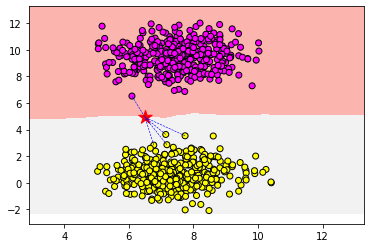

新数据点([6.5  4.92])在KNN分类器上的分类结果为：[1]


In [18]:
# 将训练集进行可视化
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.spring, edgecolor = 'k')

# 指定待分类的新数据点 X_sample, 并使用KNN分类器对其进行分类预测
X_sample = np.array([[6.5, 4.92]])
y_sample = clf.predict(X_sample)

# 将新数据点进行可视化
plt.scatter(X_sample[0][0], X_sample[0][1], marker = "*", c = "red", s = 200)

# 获得样本的近邻点，默认情况下数量(n_neighbors = 5)为默认近邻数量，同时输出这些点于预测点连线
# 此处 kneighbors()获取到的是X中的近邻样本的索引值
neighbors = clf.kneighbors(X_sample, return_distance = False)
for i in neighbors[0]:
    plt.plot([X_train[i][0], X_sample[0][0]], [X_train[i][1], X_sample[0][1]], 'b--', linewidth = 0.6)
plt.show()

# 输出分类预测结果
print("新数据点({0})在KNN分类器上的分类结果为：{1}".format(X_sample[0], y_sample))

In [19]:
neighbors = clf.kneighbors(X_sample, return_distance=False)
print("新数据点{0}, 包含{1}个近邻，它们分别是: {2}.".format(X_sample, neighbors.size, neighbors))

新数据点[[6.5  4.92]], 包含5个近邻，它们分别是: [[589 281 194 247  83]].


In [20]:
# 输出模型评分结果
print("模型正确率为：{:.2f}".format(clf.score(X_test, y_test)))

模型正确率为：1.00
